# CS 455 - Module 3 Demonstration (Titanic Dataset)

This example makes use of the [Kaggle](https://www.kaggle.com/) [Titanic Challenge's data set](https://www.kaggle.com/c/titanic/).  Its purpose is to introduce you to some basic ML coding concepts including data exploration, classification, and verification and validation. To download the data set, you will need to log into [Kaggle.com](https://www.kaggle.com) and follow this [link to download all data files](https://www.kaggle.com/account/login?ReturnUrl=%2Fc%2F3136%2Fdownload-all) associated with the challenge, and finally save the files to a subfolder in datasets called titanic (i.e. create "datasets/titanic/" and copy the files there).

## Loading Data

This snippet will load the data into a [Pandas Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) to [read from the CVS files](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv).

In [1]:
import pandas as pd
import os

# Set path to data set and specify data set file names
data_path = os.path.join("datasets","titanic")
train_filename = "train.csv"
test_filename = "test.csv"
gender_filename = "gender_submission.csv"

def read_csv(data_path, filename):
    joined_path = os.path.join(data_path, filename)
    return pd.read_csv(joined_path)

# Read CSV file into Pandas Dataframes
train_df = read_csv(data_path, train_filename)
test_df = read_csv(data_path, test_filename)
gender_df = read_csv(data_path, gender_filename)

## Explore Data Sets


| Variable | Definition | Key |
|----------|--------------------------------------------|-------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                 |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                       |
| sex      | Sex                                        |                                                 |
| Age      | Age in years                               |                                                 | 	
| sibsp    | # of siblings / spouses aboard the Titanic |                                                 | 	
| parch    | # of parents / children aboard the Titanic |                                                 |
| ticket   | Ticket number                              |                                                 |
| fare     | Passenger fare                             |                                                 | 
| cabin    | Cabin number                               |                                                 | 
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton  | 

In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Queries on DataFrames

In [8]:
survivors = train_df.query('Survived == 0')
survivors.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [9]:
# Locate the record for the "Unsinkable Molly Brown" ne Margaret Tobin
molly = train_df[train_df['Name'].str.contains("Margaret Tobin")]
molly.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C


## Visualizing Data using Matplotlib

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B941E73D30>,
      dtype=object)

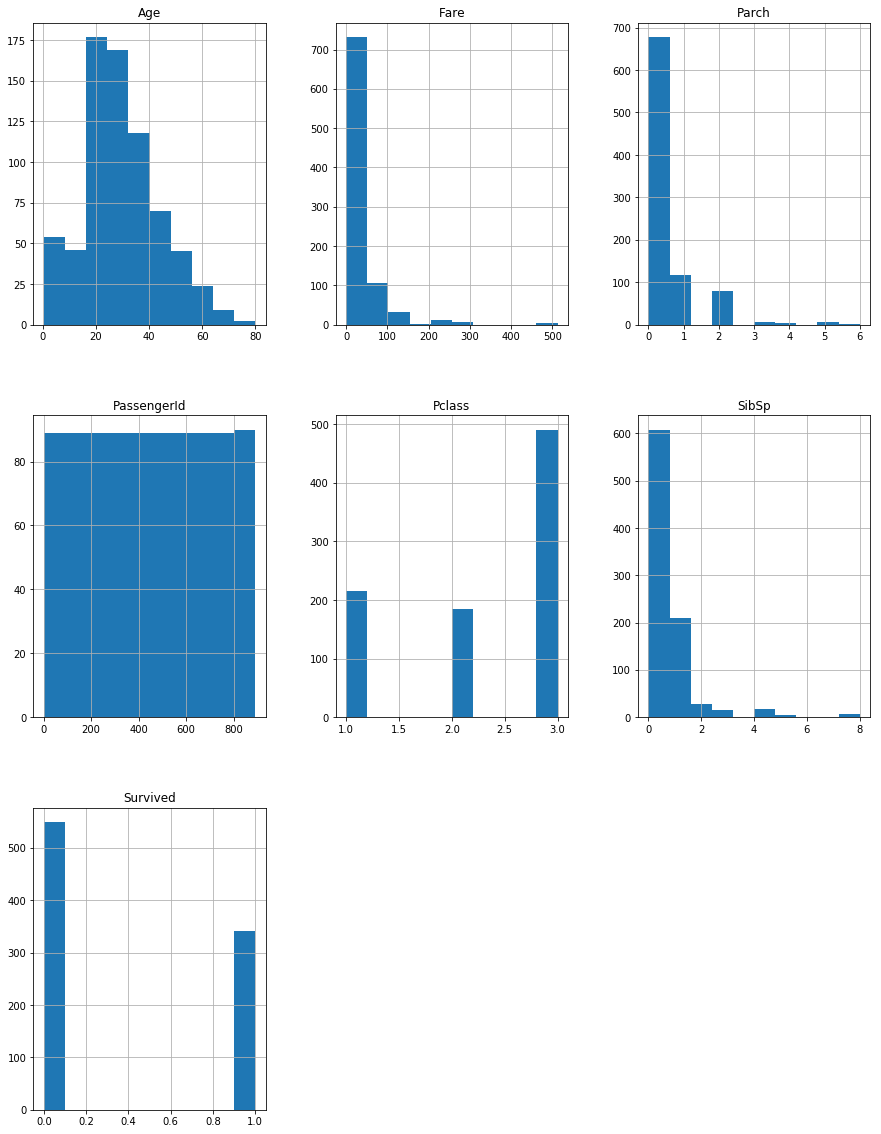

In [10]:

%matplotlib inline
import matplotlib.pyplot as plt

train_df.hist(figsize=(15,20))

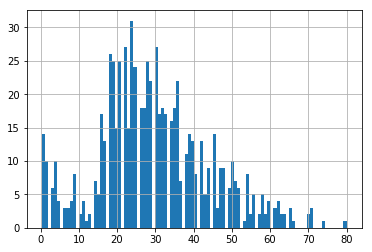

In [11]:
train_df["Age"].hist(bins=100)

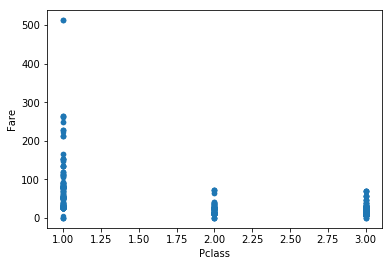

In [ ]:
train_df.plot(kind="scatter",x="Pclass",y="Fare")

## Data Preparation

In data preparation, we must convert the data that we have received into numerical or categorical forms that our classifier can use.  

This process will involve using pipelines and transforms from Scikit-Learn.  This process will include the conversion of numerical data into numpy arrays.  Next, categorical data will be converted into numpy arrays for each category.  The two arrays are merged to create a training set.  Finally, we copy over our training data's set of labels, which we will use for training and testing.

In [ ]:
# Numeric Pipeline Includes
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

import numpy as np

In [ ]:
# Create a DataFrameSelector, which will return all of the data associated with the tags we pass into it. 

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attributes):
        self.attributes = attributes
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attributes]

In [ ]:
# Extract Numeric Data:
#
# Builds a pipeline of transforms. First, the columns are extracted for desired data frame columns.
# Next, it reads the numeric values and replaces NaN cells with the median of the overall column.

numeric_pipe = Pipeline([
        ("Select", DataFrameSelector(["Age", "Fare", "SibSp", "Parch"])), # Selects Fields from dataframe
        ("Imputer", SimpleImputer(strategy="median")),   # Fills in NaN w/ median value for its column
    ])

# Test the Pipeline
numeric_pipe.fit_transform(train_df)

In [ ]:
# Handle Missing Category Cells:
#
# This imputer reads the data elements passed into it and generates a count for each of the 
# categories for each column.  During the transform, it will replace NaN with the most frequently used 
# for that column
#
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        self.most_frequent = pd.Series([X[c].value_counts().index[0] for c in X], 
                                       index = X.columns)
        return self
    
    def transform(self, X):
        return X.fillna(self.most_frequent)

In [ ]:
# Extract Categorical Data
#
# Creates an pipeline to first reads and then transform the data with the MostFrequentImputer.  
# Next, it does OneHot encoding, which converts each category into a binary numeric representation 
# where each bit represents one category. 

categories_pipe = Pipeline([
        ("Select", DataFrameSelector(["Pclass", "Sex", "Embarked"])), # Selects Fields from dataframe
        ("MostFreqImp", MostFrequentImputer()), # Fill in NaN with most frequent
        ("OneHot", OneHotEncoder(sparse=False)), # Onehot encode
    ])

categories_pipe.fit_transform(train_df)

# Produces np array with 3 bits for Pclass, 2 bits for sex, and three bits for embarked.

In [ ]:
# Assemble the Training Data
#
# We will use the two previously built pipelines to process the data and then will join the data together.
preprocessing_pipe = FeatureUnion(transformer_list = [
        ("numeric pipeline", numeric_pipe), 
        ("categories pipeline", categories_pipe)
     ])
    
train_X_data = preprocessing_pipe.fit_transform(train_df)
test_X_data = preprocessing_pipe.fit_transform(test_df)

# Preview row of training data (one passenger's data)
train_X_data[0]

In [ ]:
train_y_data = train_df["Survived"]

## Building a Classifier, Training, and Predicting

In [ ]:
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
k=10
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(train_X_data, train_y_data) #Train on our Kaggle's full training data set 
survivors = classifier.predict(test_X_data) #Run Prediction on Kaggle's test data set

survivors


For the Kaggle competition, you could format the output of survivors to the required format and submit it for assessment.

However, since we do not know the truth data (i.e. survival label) for the test set.  So, we need to use the training set to do some cross-validation of our work.


## Cross Validation Score Examples

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# KNN Classifier 10-fold Validation
k=10
knn_classifier = KNeighborsClassifier(n_neighbors=k)

knn_scores = cross_val_score(knn_classifier, train_X_data, train_y_data, cv=10) #cross-validate using 10-fold test
knn_scores.mean() # mean score across all 10 runs

In [ ]:
# SVC Classifier 10-fold Validation
from sklearn.svm import SVC

svc_classifier = SVC(gamma="auto")
svc_scores = cross_val_score(svc_classifier, train_X_data, train_y_data, cv=10) #cross-validate using 10-fold test
svc_scores.mean() # mean score across all 10 runs

In [ ]:
# Decision Tree 10-fold Validation
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_scores = cross_val_score(dt_classifier, train_X_data, train_y_data, cv=10) #cross-validate using 10-fold test
dt_scores.mean() # mean score across all 10 runs

**NOTE:** This following snippet of text is directly from Geron's notebooks listed in the references.

Instead of just looking at the mean accuracy across the 10 cross-validation folds, let's plot all 10 scores for each model, along with a box plot highlighting the lower and upper quartiles, and "whiskers" showing the extent of the scores (thanks to Nevin Yilmaz for suggesting this visualization). Note that the `boxplot()` function detects outliers (called "fliers") and does not include them within the whiskers. Specifically, if the lower quartile is $Q_1$ and the upper quartile is $Q_3$, then the interquartile range $IQR = Q_3 - Q_1$ (this is the box's height), and any score lower than $Q_1 - 1.5 \times IQR$ is a flier, and so is any score greater than $Q3 + 1.5 \times IQR$.

In [ ]:
# Modified from Geron's coding example to include different classifiers
plt.figure(figsize=(8, 4))

plt.plot([1]*10, knn_scores, ",")
plt.plot([2]*10, svc_scores, ".")
plt.plot([3]*10, dt_scores, ".")
plt.boxplot([knn_scores, svc_scores, dt_scores], labels=("KNN", "SVC","Decision Tree"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

## Confusion Matrix with Cross Validation

The following examples with use the 10-fold cross-validation technique to make predictions and then display the confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.model_selection import cross_val_predict

In [ ]:

def plot_precision_recall_curve(y, y_score):
    """
    Prints a precision vs. recall curve.
    """
    precisions, recalls, thresholds = precision_recall_curve(y, y_score)
    plt.figure(figsize=(8, 6))
    plt.title("Precision-Recall Curve")
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.show()
    

In [ ]:

def plot_roc(y, y_score):
    """
    Prints a Receiver Operating Characteristic (ROC) Curve
    """
    fpr, tpr, thresholds = roc_curve(y, y_score)
    plt.figure(figsize=(8, 6))
    plt.title("ROC Curve")
    plt.plot(fpr, tpr, linewidth=2)
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.show()
    

In [ ]:
def evaluate_classifier(y, y_pred):
    """
    Prints the confusion matrix, precision score, recall score, and f1 score
    """
  
    print("Confusion Matrix:")
    print(confusion_matrix(y, y_pred))
    print("Pecision Score = " + str(precision_score(y, y_pred)))
    print("Recall Score = " + str(recall_score(y,y_pred)))
    print("F1 Score = " + str(f1_score(y,y_pred)))
    

### KNN Classifier Performance Metrics

In [ ]:
# KNN Performance
knn_y_pred = cross_val_predict(knn_classifier, train_X_data, train_y_data, cv=10)

knn_y_probas = cross_val_predict(knn_classifier, train_X_data, train_y_data, cv=10, method="predict_proba")
knn_y_scores = knn_y_probas[:,1]

plot_precision_recall_curve(train_y_data, knn_y_scores)

plot_roc(train_y_data, knn_y_scores)

evaluate_classifier(train_y_data, knn_y_pred)

### SVC Classifier Performance Metrics

In [ ]:
# SVC Performance
svc_y_pred = cross_val_predict(svc_classifier, train_X_data, train_y_data, cv=10)

svc_y_probas = cross_val_predict(svc_classifier, train_X_data, train_y_data, cv=10, method="decision_function")
svc_y_scores = knn_y_probas[:,1]

plot_precision_recall_curve(train_y_data, svc_y_scores)

plot_roc(train_y_data, svc_y_scores)

evaluate_classifier(train_y_data, svc_y_pred)

### Decision Tree Classifier Performance

In [ ]:
# Decision Tree Performance
dt_y_pred = cross_val_predict(dt_classifier, train_X_data, train_y_data, cv=10)

dt_y_probas = cross_val_predict(dt_classifier, train_X_data, train_y_data, cv=10, method="predict_proba")
dt_y_scores = knn_y_probas[:,1]

plot_precision_recall_curve(train_y_data, dt_y_scores)

plot_roc(train_y_data, dt_y_scores)

evaluate_classifier(train_y_data, dt_y_pred)

# References

* Aurélien Géron, "Machine Learning Notebooks," URL: [https://github.com/ageron/handson-ml] (last accessed 2019-02-02)